In [65]:
import pandas as pd
import folium
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [66]:
df = pd.read_csv('./especies_combu_polygon.csv')

In [67]:
df.columns

Index(['key', 'datasetKey', 'publishingOrgKey', 'installationKey',
       'hostingOrganizationKey', 'publishingCountry', 'protocol',
       'lastCrawled', 'lastParsed', 'crawlId',
       ...
       'higherClassification', 'georeferenceSources', 'typeStatus',
       'georeferencedDate', 'georeferenceProtocol', 'locationAccordingTo',
       'footprintWKT', 'verbatimCoordinateSystem', 'organismID',
       'previousIdentifications'],
      dtype='object', length=140)

In [68]:
lista = df.columns

In [69]:
lista

Index(['key', 'datasetKey', 'publishingOrgKey', 'installationKey',
       'hostingOrganizationKey', 'publishingCountry', 'protocol',
       'lastCrawled', 'lastParsed', 'crawlId',
       ...
       'higherClassification', 'georeferenceSources', 'typeStatus',
       'georeferencedDate', 'georeferenceProtocol', 'locationAccordingTo',
       'footprintWKT', 'verbatimCoordinateSystem', 'organismID',
       'previousIdentifications'],
      dtype='object', length=140)

In [70]:
for e in lista:
    print(e)

key
datasetKey
publishingOrgKey
installationKey
hostingOrganizationKey
publishingCountry
protocol
lastCrawled
lastParsed
crawlId
extensions
basisOfRecord
occurrenceStatus
taxonKey
kingdomKey
phylumKey
classKey
orderKey
familyKey
genusKey
speciesKey
acceptedTaxonKey
scientificName
acceptedScientificName
kingdom
phylum
order
family
genus
species
genericName
specificEpithet
taxonRank
taxonomicStatus
iucnRedListCategory
dateIdentified
decimalLatitude
decimalLongitude
continent
stateProvince
gadm
year
month
day
eventDate
startDayOfYear
endDayOfYear
issues
modified
lastInterpreted
references
license
isSequenced
identifiers
media
facts
relations
isInCluster
datasetName
recordedBy
identifiedBy
geodeticDatum
class
countryCode
recordedByIDs
identifiedByIDs
gbifRegion
country
publishedByGbifRegion
rightsHolder
identifier
http://unknown.org/nick
verbatimEventDate
collectionCode
verbatimLocality
gbifID
occurrenceID
taxonID
catalogNumber
institutionCode
eventTime
http://unknown.org/captive
identific

In [71]:
colunas_relevantes = ["publishingCountry", "scientificName", "kingdom", "genericName", "iucnRedListCategory", "year", "month","decimalLatitude", "decimalLongitude", "class",'phylum']
df = df[colunas_relevantes]
df.head()

,publishingCountry,scientificName,kingdom,genericName,iucnRedListCategory,year,month,decimalLatitude,decimalLongitude,class,phylum
0,US,Hippobroma longiflora (L.) G.Don,Plantae,Hippobroma,NE,2024.0,3.0,-1.504886,-48.462257,Magnoliopsida,Tracheophyta
1,US,Bonnaya antipoda (L.) Druce,Plantae,Bonnaya,LC,2024.0,3.0,-1.504778,-48.462644,Magnoliopsida,Tracheophyta
2,US,"Iguana iguana (Linnaeus, 1758)",Animalia,Iguana,LC,2024.0,3.0,-1.505205,-48.462697,Squamata,Chordata
3,US,"Avicularia avicularia (Linnaeus, 1758)",Animalia,Avicularia,NE,2024.0,4.0,-1.511736,-48.483067,Arachnida,Arthropoda
4,US,"Butorides striata (Linnaeus, 1758)",Animalia,Butorides,LC,2024.0,5.0,-1.493230,-48.461513,Aves,Chordata


In [72]:
df_test = df.dropna()
df_test.shape

(548, 11)

In [73]:
df.shape

(610, 11)

In [74]:
# Create a map centered around the average coordinates
latitude = df['decimalLatitude'].astype(float).mean()
longitude = df['decimalLongitude'].astype(float).mean()

# Initialize a map
specimen_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add points to the map
for idx, row in df.iterrows():
    lat = float(row['decimalLatitude'])
    lon = float(row['decimalLongitude'])
    folium.Marker([lat, lon], popup=row['scientificName']).add_to(specimen_map)

# Display the map
specimen_map

/var/folders/q3/_mxkmyq54p9b38bl9c_0dr5w0000gn/T/ipykernel_7910/1935416012.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_kingdoms))  # Use a colormap for distinct colors


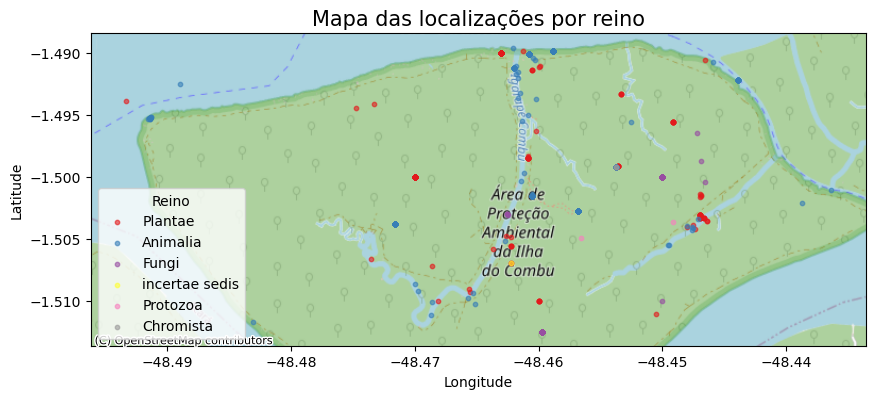

In [75]:
# Convert latitude and longitude into points
geometry = [Point(xy) for xy in zip(df['decimalLongitude'], df['decimalLatitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Define a color map for each unique kingdom
unique_kingdoms = geo_df['kingdom'].unique()
colors = plt.cm.get_cmap('Set1', len(unique_kingdoms))  # Use a colormap for distinct colors
kingdom_color_map = {kingdom: colors(i) for i, kingdom in enumerate(unique_kingdoms)}

# Plot the GeoDataFrame with points colored according to the kingdom
fig, ax = plt.subplots(figsize=(10, 10))

for kingdom, color in kingdom_color_map.items():
    subset = geo_df[geo_df['kingdom'] == kingdom]
    subset.plot(ax=ax, markersize=10, color=color, label=kingdom, alpha=0.6)

# Add a basemap using contextily (OpenStreetMap tiles)
cx.add_basemap(ax, crs=geo_df.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Set titles and labels
ax.set_title('Mapa das localizações por reino', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Reino')

# Show the plot
plt.savefig('Analise-por-reino.png', dpi=400, bbox_inches='tight');

In [76]:
df[(df['kingdom']=='Animalia')]['scientificName'].unique()

array(['Iguana iguana (Linnaeus, 1758)',
       'Avicularia avicularia (Linnaeus, 1758)',
       'Butorides striata (Linnaeus, 1758)',
       'Amazona amazonica amazonica',
       'Chloroceryle americana (J.F.Gmelin, 1788)',
       'Cacicus cela (Linnaeus, 1758)',
       'Glaucis hirsutus (J.F.Gmelin, 1788)',
       'Dendroplex picus (J.F.Gmelin, 1788)',
       'Rhynchonycteris naso (Wied-Neuwied, 1820)',
       'Tetrataenia surinama (Linnaeus, 1764)',
       'Ramphocelus carbo (Pallas, 1764)',
       'Helicopis gnidus (Fabricius, 1787)',
       'Rutela lineola (Linnaeus, 1758)',
       'Ictinia plumbea (Gmelin, 1788)',
       'Tyrannus melancholicus Vieillot, 1819',
       'Thraupis episcopus (Linnaeus, 1766)',
       'Anableps anableps (Linnaeus, 1758)',
       'Coereba flaveola (Linnaeus, 1758)',
       'Anthracothorax nigricollis (Vieillot, 1817)',
       'Thraupis palmarum (Wied-Neuwied, 1821)',
       'Turdus leucomelas Vieillot, 1818',
       'Caracara plancus (J.F.Miller, 1777)

In [77]:
# pegando apenas o açaí
acai_df = df[(df['kingdom']=='Plantae') & (df['genericName']=='Euterpe')]


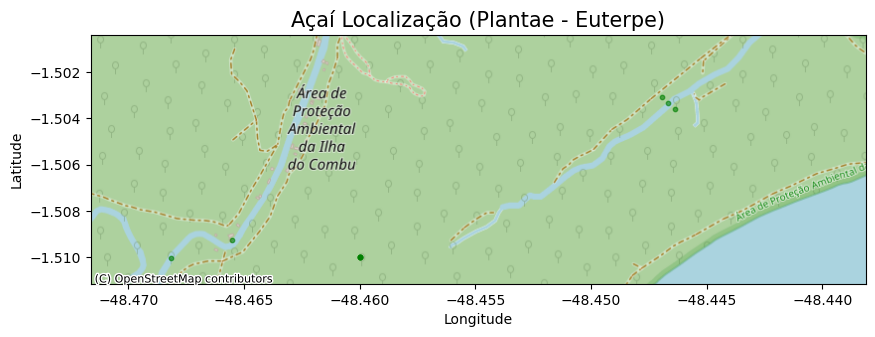

In [78]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx
import matplotlib.pyplot as plt

acai_df = df[(df['kingdom'] == 'Plantae') & (df['genericName'] == 'Euterpe')]

# Convert latitude and longitude into points
acai_geometry = [Point(xy) for xy in zip(acai_df['decimalLongitude'], acai_df['decimalLatitude'])]
acai_geo_df = gpd.GeoDataFrame(acai_df, geometry=acai_geometry, crs="EPSG:4326")

# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# Plot points
acai_geo_df.plot(ax=ax, markersize=10, color='green', alpha=0.6)

# Get the current plot limits and expand them to zoom out a bit
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Expand the limits by 10% to zoom out
ax.set_xlim(xmin - (xmax - xmin) * 0.1, xmax + (xmax - xmin) * 0.3)
ax.set_ylim(ymin - (ymax - ymin) * 0.1, ymax + (ymax - ymin) * 0.3)

# Add a basemap for geographic context
cx.add_basemap(ax, crs=acai_geo_df.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Set titles and labels
ax.set_title('Açaí Localização (Plantae - Euterpe)', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.savefig('Analise-pontos-açaí.png', dpi=400, bbox_inches='tight');

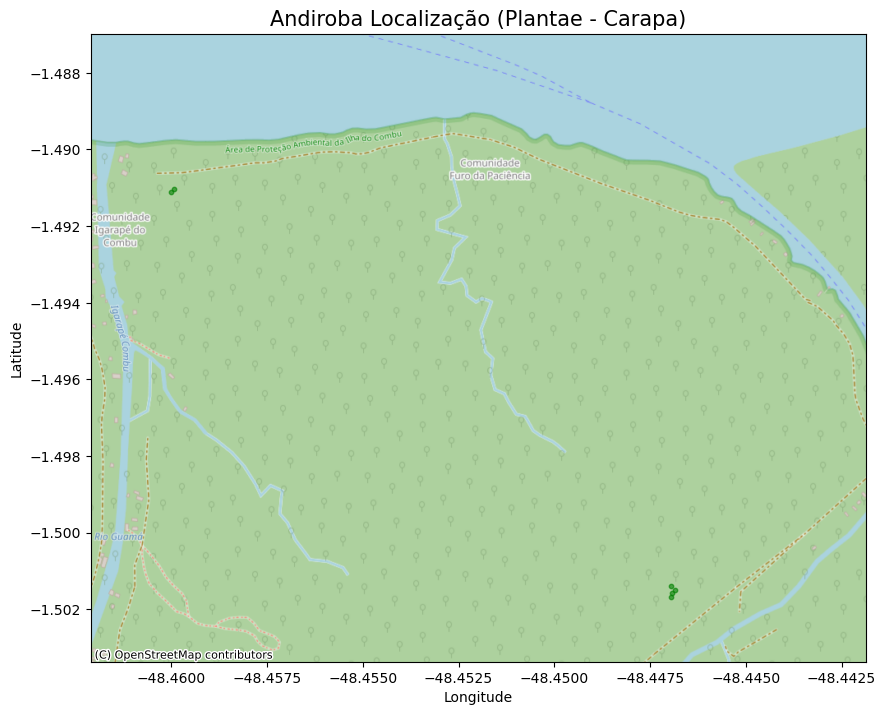

In [79]:
andiroba_df = df[df['scientificName']=='Carapa guianensis Aubl.']
# Convert latitude and longitude into points
andiroba_geometry = [Point(xy) for xy in zip(andiroba_df['decimalLongitude'], andiroba_df['decimalLatitude'])]
andiroba_geo_df = gpd.GeoDataFrame(andiroba_df, geometry=andiroba_geometry, crs="EPSG:4326")

# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# Plot points
andiroba_geo_df.plot(ax=ax, markersize=10, color='green', alpha=0.6)

# Get the current plot limits and expand them to zoom out a bit
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Expand the limits by 10% to zoom out
ax.set_xlim(xmin - (xmax - xmin) * 0.1, xmax + (xmax - xmin) * 0.3)
ax.set_ylim(ymin - (ymax - ymin) * 0.1, ymax + (ymax - ymin) * 0.3)

# Add a basemap for geographic context
cx.add_basemap(ax, crs=andiroba_geo_df.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Set titles and labels
ax.set_title('Andiroba Localização (Plantae - Carapa)', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.savefig('Analise-pontos-andiroba.png', dpi=400, bbox_inches='tight');

In [80]:
anos_reino = df.loc[df["kingdom"] == "Animalia"].groupby("year")["kingdom"].count()
anos_reino

year
1989.0     20
1990.0      2
1991.0      6
1999.0     16
2011.0      3
2017.0     27
2018.0      7
2019.0      2
2021.0      1
2022.0    121
2023.0     97
2024.0     32
Name: kingdom, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


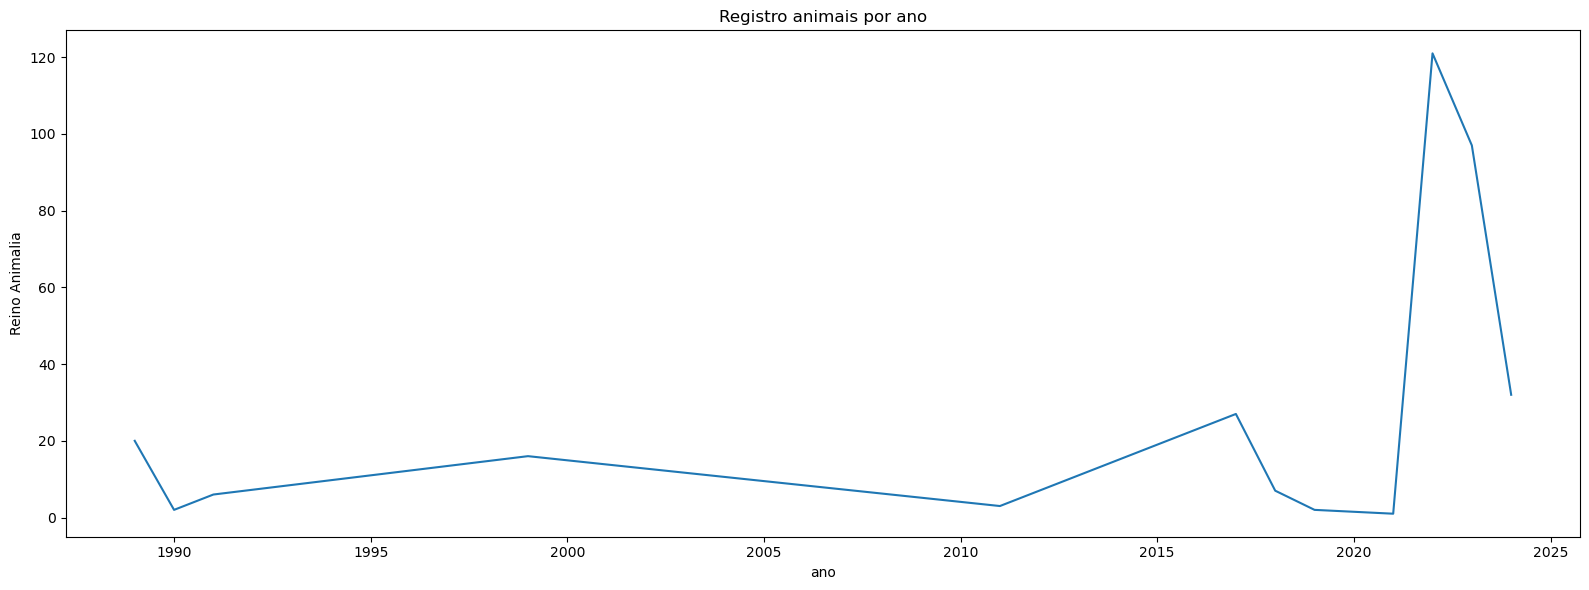

In [81]:
plt.figure(figsize=(16,6))
plt.title("Registro animais por ano")
plt.xlabel("ano")
plt.ylabel("Reino Animalia")
sns.lineplot(anos_reino)
plt.tight_layout()
plt.savefig("registro_animais_ano.png", format="png", dpi=300) 

In [82]:
from fpdf import FPDF
class PDFWithImage(FPDF):

    def header(self):
        # Titulos
        self.set_font('Arial', '', 16)
        self.cell(0, 10, 'ANALISE EXPLORATÓRIA DE DADOS ', 0, 1, 'c')

        self.set_font('Arial', 'B', 12)
        self.cell(0, 4, 'CESUPA', 0, 1, 'c')

    def footer(self):
        # Rodapé (opcional)
        self.set_y( -15 )
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Página { self.page_no() }', 0, 0, 'C')

In [83]:
pdf = PDFWithImage()
pdf.add_page()

In [84]:
# Adicione um descritivo de texto
pdf.set_font('Arial', size=12)

texto = """
Esse relatório refere-se ao cenário de operação de crédito,
solicitada por estados, Distrito Federal e municípios.
"""
pdf.multi_cell(0, 5, texto)
pdf.image('Analise-por-reino.png', x=10, y=pdf.get_y() + 5, w=185)

pdf.image('Analise-pontos-açaí.png', x=10, y=pdf.get_y() + 120, w=185)

# Pagina 2
pdf.add_page()
pdf.image('Analise-pontos-andiroba.png', x=10, y=pdf.get_y() + 10, w=185)

pdf.add_page()
pdf.image('peixes-por-ano.jpeg', x=10, y=pdf.get_y() + 10, w=185)

pdf.add_page()
pdf.image('animais-por-ano.jpeg', x=10, y=pdf.get_y() + 10, w=185)


# Salve o PDF em um arquivo
pdf_file = "Material.pdf"
pdf.output(pdf_file)

''